<a href="https://colab.research.google.com/github/bhavika2222/mission_first/blob/master/practical3_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING ALL LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras. layers import Dense,Conv2D
from keras. layers import Flatten,MaxPool2D
from keras. layers import Dropout

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


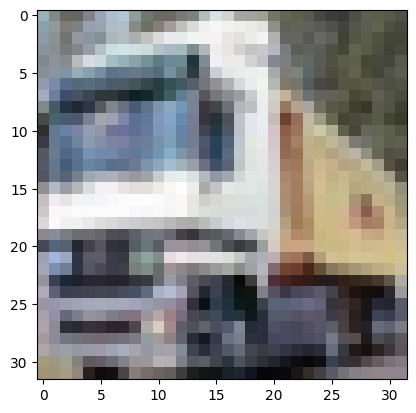

In [3]:
plt.imshow(x_train[1])

In [4]:
x_train.shape

(50000, 32, 32, 3)

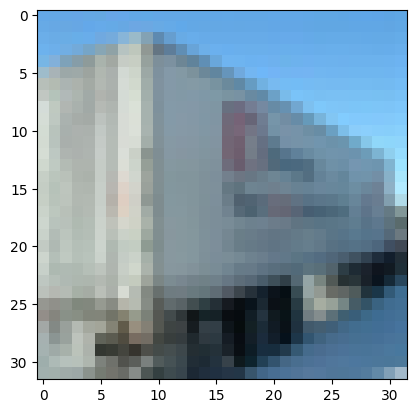

In [5]:
plt.imshow(x_train[15])

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

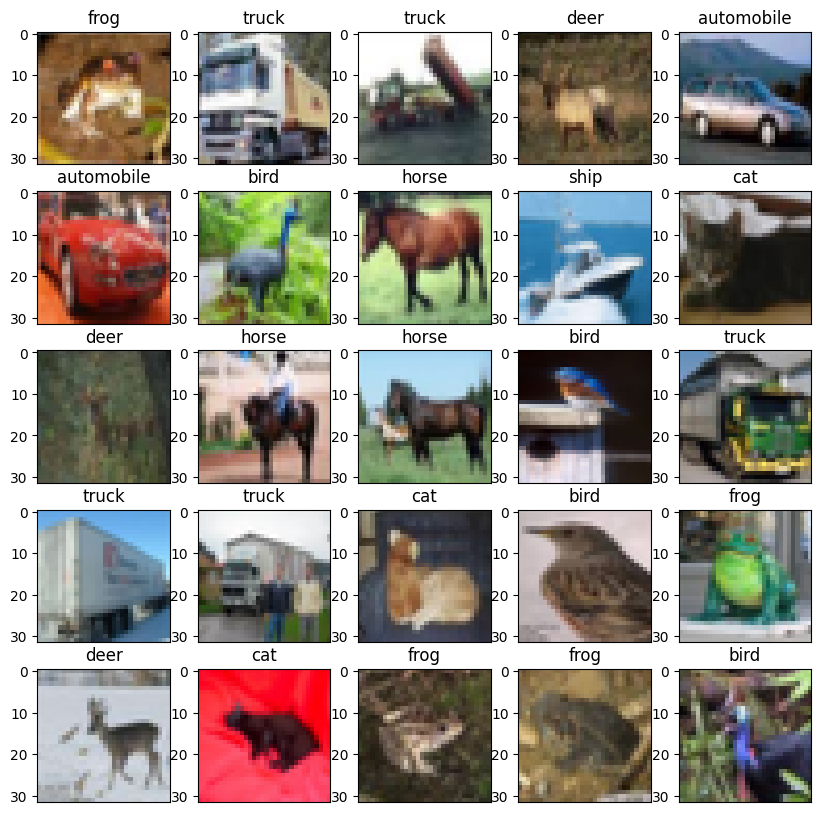

In [10]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.title(labels[y_train[i][0]])
  plt.imshow(x_train[i])

NORMALIZE

In [11]:
x_train=x_train/255
x_test=x_test/255

ONE HOT ENCODING OF O/P VARIABLES

In [12]:
from keras.utils import to_categorical


In [13]:
y_train_new=to_categorical(y_train)
y_test_new=to_categorical(y_test)

In [14]:
y_train_new.shape


(50000, 10)

MODEL BUILDING (FEATURES EXTRACTION)

In [41]:
model=Sequential()
model.add(Conv2D (filters=32,input_shape=(32,32,3),kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout (0.2))
model.add(Conv2D (filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

In [42]:
model.add(Dense(512,activation ='relu'))
model.add(Dense(10,activation ='softmax'))


In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)             

**BELOW IMAGE IS ARCHITECTURE OF CNN IMAGE CLASSIFIER**

In [44]:
from keras.utils import plot_model

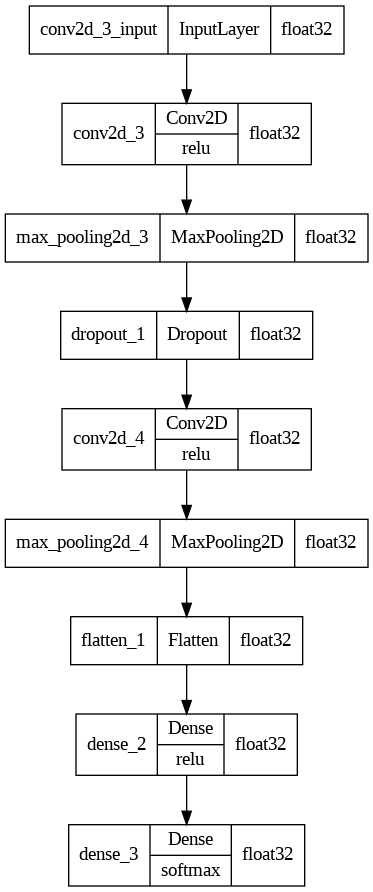

In [45]:
plot_model(model,show_dtype=True,show_layer_activations=True,show_layer_names=True)

COMPILE THE MODEL


In [46]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

TRAIN THE MODEL

In [47]:
model.fit(x_train,y_train_new,epochs=10,batch_size=20)

Epoch 1/10
2500/2500 [==============================] - 12s 4ms/step - loss: 1.3753 - accuracy: 0.5048
Epoch 2/10
2500/2500 [==============================] - 10s 4ms/step - loss: 1.0101 - accuracy: 0.6442
Epoch 3/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.8360 - accuracy: 0.7079
Epoch 4/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.6911 - accuracy: 0.7588
Epoch 5/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5667 - accuracy: 0.8000
Epoch 6/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.4549 - accuracy: 0.8386
Epoch 7/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.3644 - accuracy: 0.8725
Epoch 8/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2940 - accuracy: 0.8963
Epoch 9/10
2500/2500 [==============================] - 11s 4ms/step - loss: 0.2401 - accuracy: 0.9176
Epoch 10/10
2500/2500 [==============================] - 10s 4ms/step - lo

EVALUATE THE MODEL ON TEST DATA

In [48]:
model.evaluate(x_test,y_test_new,batch_size=1)

10000/10000 [==============================] - 25s 2ms/step - loss: 1.3600 - accuracy: 0.7039


[1.3599905967712402, 0.7038999795913696]

In [49]:
history=model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

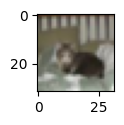

In [51]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[150])

In [52]:
new=x_train[150]
new=new.reshape(1,32,32,3)

In [53]:
labels[np.argmax(model.predict(new))]

1/1 [==============================] - 0s 383ms/step


'cat'